In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = sns.load_dataset('titanic')

In [5]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Summary Statistics

In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Histograms and Boxplots

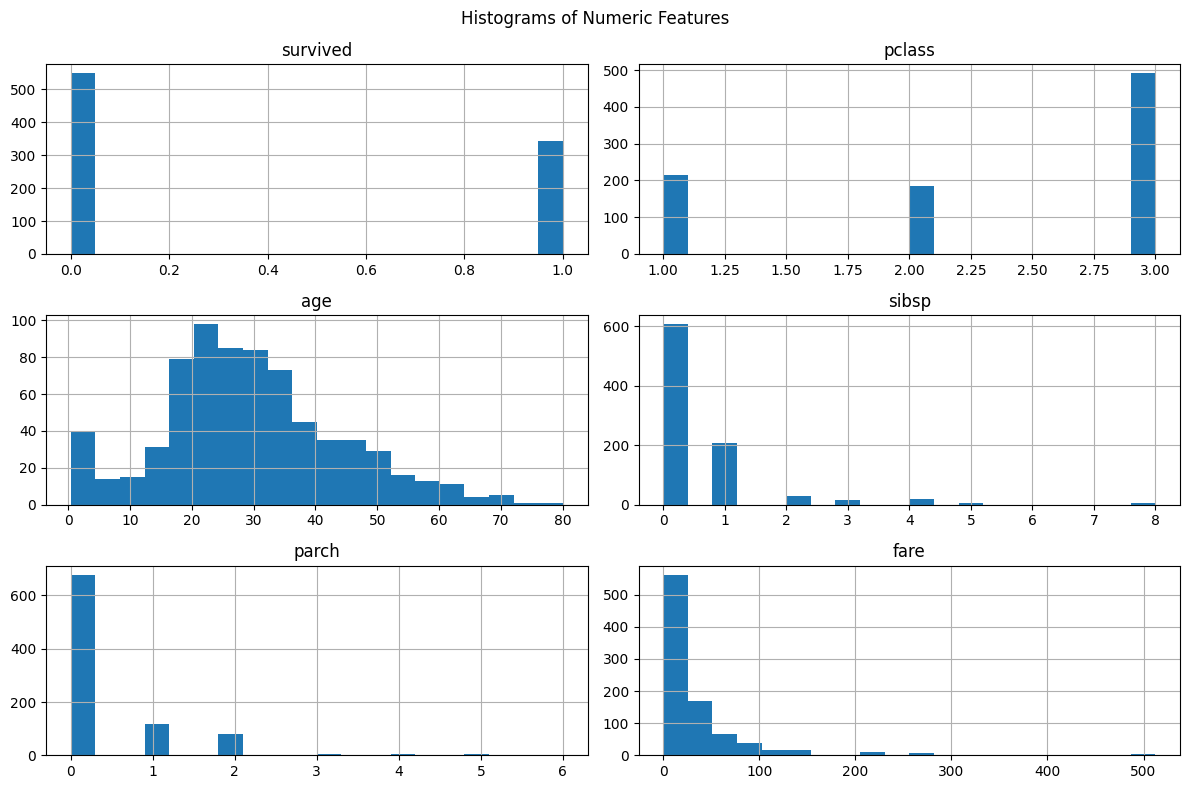

In [10]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()



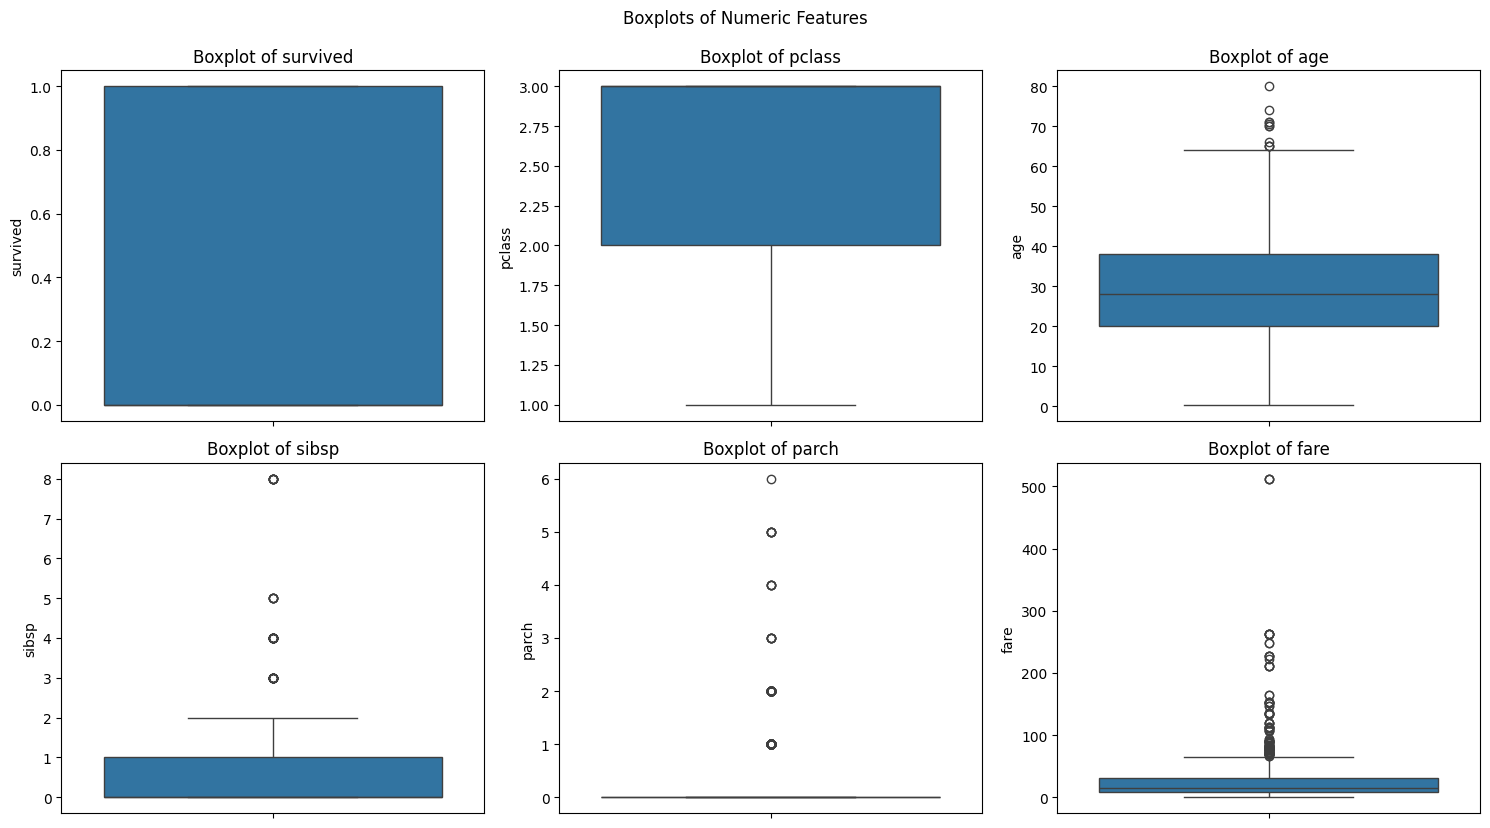

In [18]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten() 
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.suptitle("Boxplots of Numeric Features", y=1.03)
plt.show()


# Pairplot & Correlation Matrix

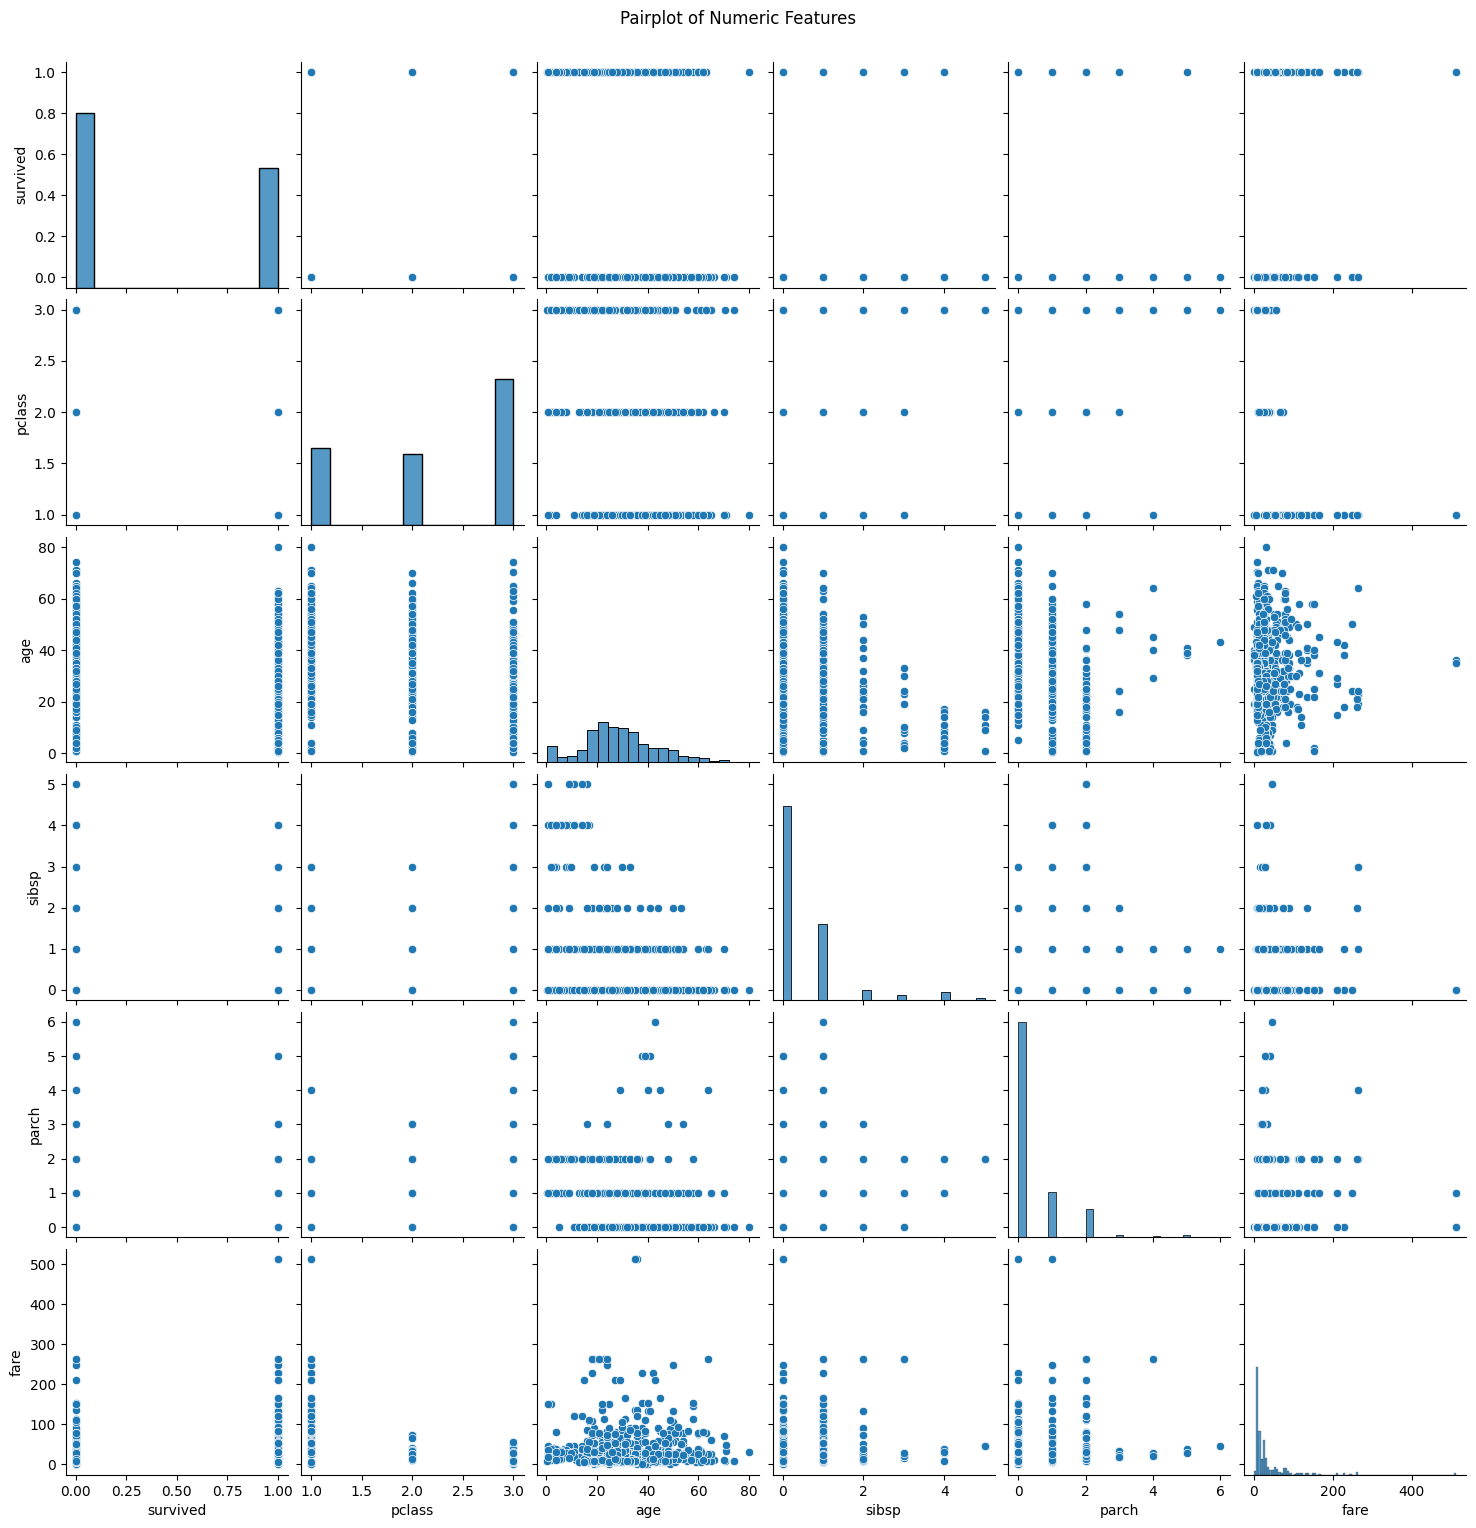

In [15]:
sns.pairplot(df[numeric_cols].dropna())
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

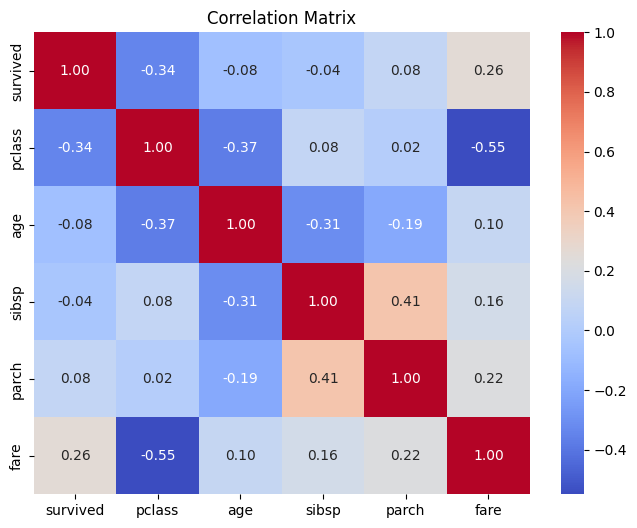

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Identify Patterns, Trends, Anomalies

# Patterns
Females had a higher survival rate than males.

1st class passengers survived more than 2nd or 3rd class.

Family size (sibsp + parch) influenced survival slightly — people with small families had better chances.


# Trends
Children (age < 10) were more likely to survive than adults and elderly.

Survivors generally paid higher fares — indicating that passengers with expensive tickets had better access to safety.

Survival decreased as passenger class number increased (1st > 2nd > 3rd).

# Anomalies (Outliers)
Fare outliers: Some passengers paid extremely high fares (above $500), unlike most others.

Age outliers: A few passengers were above 70 years old, which is uncommon.

Some missing data in features like age, embarked, deck — which might need cleaning.

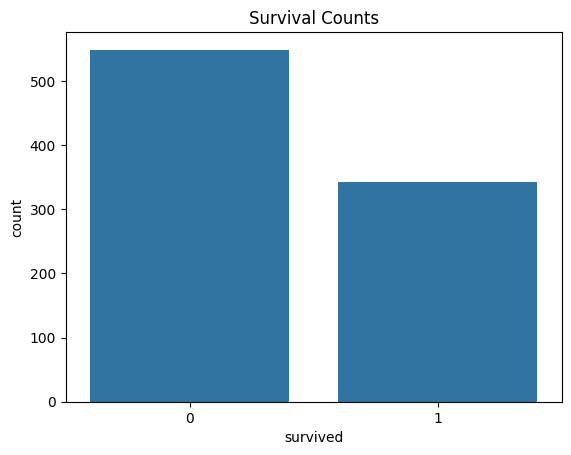

In [19]:
sns.countplot(data=df, x='survived')
plt.title("Survival Counts")
plt.show()

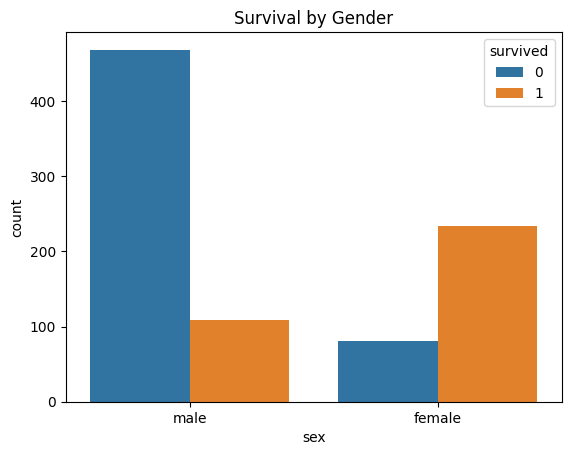

In [20]:
sns.countplot(data=df, x='sex', hue='survived')
plt.title("Survival by Gender")
plt.show()

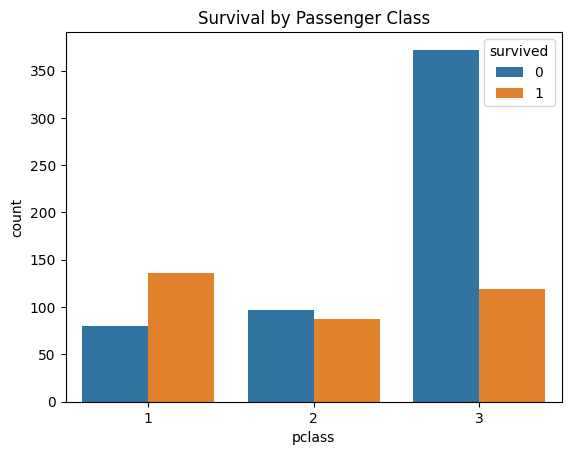

In [21]:
sns.countplot(data=df, x='pclass', hue='survived')
plt.title("Survival by Passenger Class")
plt.show()

#  Basic Feature-Level Inferences

Females had a much higher survival rate than males.

Higher-class passengers (1st class) had better survival chances.

Fare and age showed some outliers.

There is a slight positive correlation between parch and sibsp (likely traveling with family).